In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
FILE_PATH = os.path.join(os.getcwd(), "../data-files", "titanic-passengers.csv")
DF = pd.read_csv(FILE_PATH)

Use IQR method (Interquartile Range) for identifying outliers

In [3]:
def iqr_method(df_distribute):
    q1 = df_distribute.quantile(0.25)
    q3 = df_distribute.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    print(f"IQR Formular: {lower_bound} < x < {upper_bound}")
    print(f"Start filtering data...")
    return df_distribute[(df_distribute < lower_bound) | (df_distribute > upper_bound)]

Entry point

IQR Formular: -6.6875 < x < 64.8125
Start filtering data...


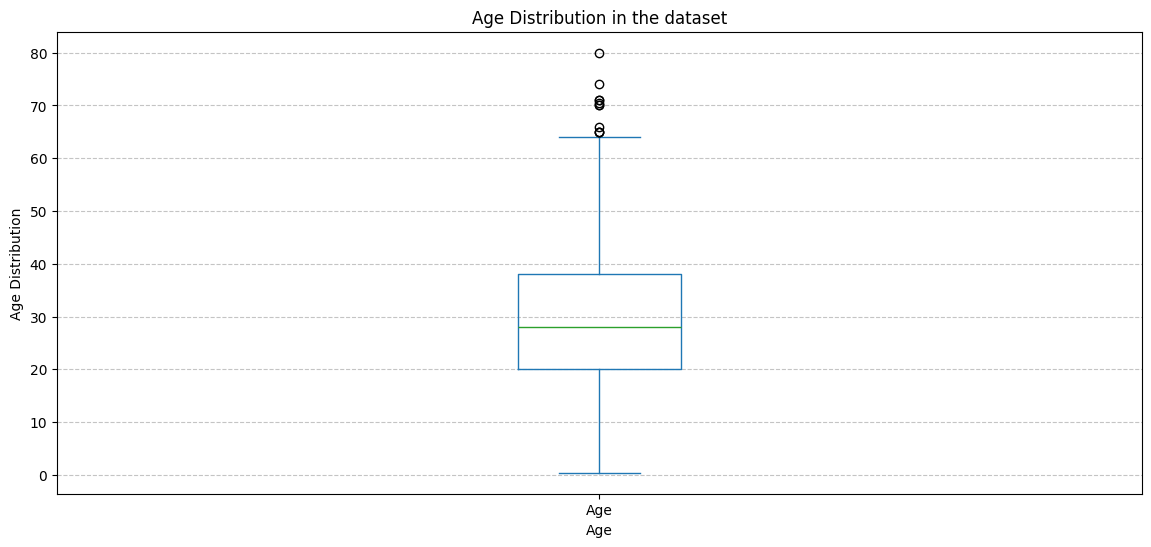

Total of Outliers: 11
Outliers values (Unique values): 66.0, 65.0, 71.0, 70.5, 80.0, 70.0, 74.0


In [4]:
if __name__ == "__main__":
    distribution = DF["Age"].dropna() # We use Age column for examination
    outliers = iqr_method(distribution)
    # Start showing plot
    plt.figure(figsize=(14, 6))
    distribution.plot(kind='box')
    plt.title('Age Distribution in the dataset')
    plt.xlabel('Age')
    plt.ylabel('Age Distribution')
    plt.grid(True, axis='y', linestyle='--', alpha=0.75)
    plt.show()

    print(f"Total of Outliers: {len(outliers)}")
    print(f"Outliers values (Unique values): {", ".join(map(str, outliers.unique()))}")